In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64

In [5]:
file = open("broadband_long2000-2018rev.csv","r")
df = pd.read_csv("broadband_long2000-2018rev.csv")

In [6]:
df.head()

,statenam,county,year,id,broadband,cfips
0,Alabama,Autauga County,2000,0500000US01001,NaN,1001
1,Alabama,Autauga County,2001,0500000US01001,NaN,1001
2,Alabama,Autauga County,2002,0500000US01001,NaN,1001
3,Alabama,Autauga County,2003,0500000US01001,NaN,1001
4,Alabama,Autauga County,2004,0500000US01001,NaN,1001


In [7]:
df["state"] = df["statenam"]
del df["statenam"]
df["broadband_pct"] = df["broadband"]
del df["broadband"]

In [8]:
df.head()

,county,year,id,cfips,state,broadband_pct
0,Autauga County,2000,0500000US01001,1001,Alabama,NaN
1,Autauga County,2001,0500000US01001,1001,Alabama,NaN
2,Autauga County,2002,0500000US01001,1001,Alabama,NaN
3,Autauga County,2003,0500000US01001,1001,Alabama,NaN
4,Autauga County,2004,0500000US01001,1001,Alabama,NaN


In [9]:
df.set_index(["state"])

,county,year,id,cfips,broadband_pct
state,,,,,
Alabama,Autauga County,2000,0500000US01001,1001,NaN
Alabama,Autauga County,2001,0500000US01001,1001,NaN
Alabama,Autauga County,2002,0500000US01001,1001,NaN
Alabama,Autauga County,2003,0500000US01001,1001,NaN
Alabama,Autauga County,2004,0500000US01001,1001,NaN
...,...,...,...,...,...
Wyoming,Weston County,2014,0500000US56045,56045,NaN
Wyoming,Weston County,2015,0500000US56045,56045,NaN
Wyoming,Weston County,2016,0500000US56045,56045,NaN


# Preliminary EDA

Which columns in your data sets will help you answer the questions posed by
your problem statement?

1. Which columns represent the key pieces of information you want to examine (i.e.your target variables)?
Broadband Percentage

2. How many numerical, textual, datetime etc. columns are in your dataset?
Six

3. Pick out any similar columns among your disparate data sets for potential linking later on on the EDA process
State, County, FIPS Code

● Explore Individual columns for preliminary insights
1. How many null values are present in your data (what percentage)?
46522 (78%)

2. Plot one-dimensional distributions of numerical columns (ex. histograms) and observe the overall shape of the data (i.e. normal distribution, skewed, multimodal, discontinuous
Data is skewed to the left

3. Compute basic statistics of numerical columns
count    13005.000000
mean         0.654916
std          0.198363
min          0.011258
25%          0.554252
50%          0.710000
75%          0.800389
max          0.973881

4. Calculate subgroup size of text/categorical data (such as the pd.value_counts() method)
There are 1867 counties out of the 3006 US counties

5. Explore any date/datetime columns for basic trends. How long is the period of time covered by the dataset? Do any seasonality trends immediately become apparent?
More counties reported later on, it's not apparent if they were not reporting or did not have broadband at the time.

2000-2005 216-217
2008-2021 328
2016-2017 812-817
2017-2018 3132-3133

In [11]:
#Number of null values (78%)
df.isna().sum()

county               0
year                 0
id                   0
cfips                0
state                0
broadband_pct    46522
dtype: int64

Text(0.5, 0, 'Broadband Percentage')

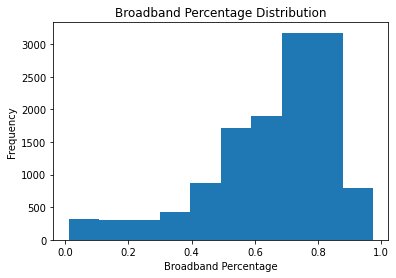

In [19]:
df["broadband_pct"].plot.hist()
plt.title("Broadband Percentage Distribution")
plt.xlabel("Broadband Percentage")

In [21]:
#Compute basic stats
df["broadband_pct"].describe()

count    13005.000000
mean         0.654916
std          0.198363
min          0.011258
25%          0.554252
50%          0.710000
75%          0.800389
max          0.973881
Name: broadband_pct, dtype: float64

In [22]:
df["broadband_pct"].value_counts()

0.500000    53
0.600000    28
0.750000    25
0.733000    24
0.783000    22
            ..
0.807175     1
0.620253     1
0.868030     1
0.552885     1
0.742928     1
Name: broadband_pct, Length: 9551, dtype: int64

In [37]:
dfcounty = df["county"].drop_duplicates()
dfcounty

0           Autauga County
19          Baldwin County
38          Barbour County
57             Bibb County
76           Blount County
               ...        
59413      Sublette County
59432    Sweetwater County
59470         Uinta County
59489      Washakie County
59508        Weston County
Name: county, Length: 1867, dtype: object

In [26]:
df_nonans = df.dropna()
df_nonans["year"].value_counts()

2018    3133
2017    3132
2014     817
2013     817
2015     813
2016     812
2012     328
2007     328
2009     328
2010     328
2008     328
2011     328
2003     217
2005     216
2004     216
2006     216
2002     216
2001     216
2000     216
Name: year, dtype: int64

I would want to add population data to this to categorize counties as Rural or Urban by population size. I would use that as one of my main variables along with broadband percentage. 

● Plot two-dimensional distributions of your variables of interest against your target variable(s).
○ Across different values of your independent variable, how does the dependent
variable change?
○ Which interactions of variables provide the most interesting insights?
○ What trends do you see in the

● Analyze any correlations between your independent and dependent variables

○ Understand and resolve surprising correlations between these variables, and usethis information to validate your initial hypothesis.

The broadband percentage is lower or nonexistent in rural counties (From the counties I know are Urban vs Rural in LA, will be able to determine once I add the new column in). 